In [1]:
import re
import numpy as np
import pandas as pd
import math as m
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


### 1.  Clean and transform the above dataset to add the following columns: Start year, end year, director, actors.

In [2]:
movies = pd.read_csv("movies.csv")
movies.head(1)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN


In [3]:
year_formats = movies["YEAR"].str.len()
print(year_formats.value_counts())      #Show how many different year entry formats present in data

YEAR
6.0     3767
8.0     3159
11.0    1458
17.0     393
10.0     167
15.0     164
12.0     147
4.0       29
3.0       28
5.0       28
13.0      10
7.0        3
16.0       1
20.0       1
Name: count, dtype: int64


First reformat YEAR to START YEAR AND END YEAR columns

-Step 1: extract only digits from YEAR column

In [4]:
print(movies["YEAR"].isnull().sum())
movies["YEAR"] = movies["YEAR"].fillna(" ")                                 #fill missing values with blank space
movies["YEAR"] = movies["YEAR"].apply(lambda x: re.findall(r"\d{4}", x))    #finds only patterns of 4 consecutive digits 
movies["YEAR"]

644


0             [2021]
1             [2021]
2       [2010, 2022]
3             [2013]
4             [2021]
            ...     
9994          [2021]
9995          [2021]
9996          [2022]
9997          [2021]
9998          [2021]
Name: YEAR, Length: 9999, dtype: object

In [5]:
year_formats = movies["YEAR"].str.len()
print(type(year_formats))
print(year_formats.value_counts())          #show number of remaining year entry formats

<class 'pandas.core.series.Series'>
YEAR
1    7863
2    1388
0     748
Name: count, dtype: int64


In [24]:
year_list = (
    year_formats.value_counts().rename_axis("num_digits").reset_index(name="counts")
)
for i in year_list["num_digits"]:       #show first example of each year entry type
    display("Example",i,
        movies.loc[np.where([year_formats == i])[1][0:1]]
    
    )

'Example'

1

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,START_YEAR,END_YEAR,Director,Actors,description_length
0,Blood Red Sky,[2021],"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,2021.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",134


'Example'

2

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,START_YEAR,END_YEAR,Director,Actors,description_length
2,The Walking Dead,"[2010, 2022]","Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,2010.0,2022.0,,"Andrew Lincoln, Norman Reedus, Melissa McBride...",128


'Example'

0

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,START_YEAR,END_YEAR,Director,Actors,description_length
878,Vikings: Valhalla,[],"Action, Adventure, Drama",NaN,Follow-up series to 'Vikings' set 100 years af...,"\n \n Stars:\nLaura Berlin, \nSa...",NaN,NaN,NaN,NaN,NaN,,"Laura Berlin, Sam Corlett, Bradley Freegard, F...",170


In [7]:
split = pd.DataFrame(movies["YEAR"].to_list(), columns=["START", "END"])
movies["START_YEAR"], movies["END_YEAR"] = split["START"], split["END"]
movies["START_YEAR"] = pd.to_numeric(movies["START_YEAR"])
movies["END_YEAR"] = pd.to_numeric(movies["END_YEAR"])
display(movies.head())
movies["START_YEAR"].dtype

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,START_YEAR,END_YEAR
0,Blood Red Sky,[2021],"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,2021.0,NaN
1,Masters of the Universe: Revelation,[2021],"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,2021.0,NaN
2,The Walking Dead,"[2010, 2022]","\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,2010.0,2022.0
3,Rick and Morty,[2013],"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,2013.0,NaN
4,Army of Thieves,[2021],"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,2021.0,NaN


dtype('float64')

In [8]:
lengths_start = movies["START_YEAR"].apply(lambda x: len(str(x)))
print(lengths_start.value_counts())

START_YEAR
6    9251
3     748
Name: count, dtype: int64


In [9]:
threes = np.where([lengths_start == 3])[1]
movies.loc[threes]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,START_YEAR,END_YEAR
878,Vikings: Valhalla,[],"\nAction, Adventure, Drama",NaN,\nFollow-up series to 'Vikings' set 100 years ...,"\n \n Stars:\nLaura Berlin, \nSa...",NaN,NaN,NaN,NaN,NaN
1155,The Killer,[],"\nAction, Crime, Drama",NaN,\nPlot unknown.,\n Director:\nDavid Fincher\n| \n Star:\...,NaN,NaN,NaN,NaN,NaN
1165,Hustle,[],"\nComedy, Drama, Sport",NaN,\nA washed-up basketball scout discovers a phe...,\n Director:\nJeremiah Zagar\n| \n Stars...,NaN,NaN,NaN,NaN,NaN
1375,Resident Evil,[],"\nAction, Horror, Sci-Fi",NaN,\nNearly three decades after the discovery of ...,"\n \n Stars:\nLance Reddick, \nS...",NaN,NaN,NaN,NaN,NaN
1414,Bright 2,[],"\nAction, Adventure, Crime",NaN,\nPlot unknown. Sequel to the 2017 film 'Bright.',"\n \n Stars:\nWill Smith, \nJoel...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9909,Pretty Smart,[],\nComedy,NaN,\nAdd a Plot\n,"\n \n Stars:\nCinthya Carmona, \...",NaN,NaN,NaN,NaN,NaN
9910,Pretty Smart,[],\nComedy,NaN,\nAdd a Plot\n,\n Director:\nJody Margolin Hahn\n| \n S...,NaN,NaN,NaN,NaN,NaN
9911,Pretty Smart,[],\nComedy,NaN,\nAdd a Plot\n,\n Director:\nJody Margolin Hahn\n| \n S...,NaN,NaN,NaN,NaN,NaN
9912,Pretty Smart,[],\nComedy,NaN,\nAdd a Plot\n,"\n \n Stars:\nCinthya Carmona, \...",NaN,NaN,NaN,NaN,NaN


In [10]:
lengths_end = movies["END_YEAR"].apply(lambda x: len(str(x)))
print(lengths_end.value_counts())

END_YEAR
3    8611
6    1388
Name: count, dtype: int64


In [11]:
threes = np.where([lengths_end == 3])[1]
movies.loc[threes]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,START_YEAR,END_YEAR
0,Blood Red Sky,[2021],"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,2021.0,NaN
1,Masters of the Universe: Revelation,[2021],"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,2021.0,NaN
3,Rick and Morty,[2013],"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,2013.0,NaN
4,Army of Thieves,[2021],"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,2021.0,NaN
5,Outer Banks,[2020],"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN,2020.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,[2021],"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN,2021.0,NaN
9995,Arcane,[2021],"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN,2021.0,NaN
9996,Heart of Invictus,[2022],"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN,2022.0,NaN
9997,The Imperfects,[2021],"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN,2021.0,NaN


In [12]:
display(movies["STARS"][0:5])

0    \n    Director:\nPeter Thorwarth\n| \n    Star...
1    \n            \n    Stars:\nChris Wood, \nSara...
2    \n            \n    Stars:\nAndrew Lincoln, \n...
3    \n            \n    Stars:\nJustin Roiland, \n...
4    \n    Director:\nMatthias Schweighöfer\n| \n  ...
Name: STARS, dtype: object

In [13]:
star_split = movies["STARS"].str.split("\n    ", expand=True) #splits to get Director & Actors into separate columns
star_split = star_split[[1, 2]] #keep only 2nd and 3rd column
star_split.columns = ["Director", "Actors"] #Rename columns "Director" and "Actors"
star_split.head()

,Director,Actors
0,Director:\nPeter Thorwarth\n|,"Stars:\nPeri Baumeister, \nCarl Anton Koch, \n..."
1,,"Stars:\nChris Wood, \nSarah Michelle Gellar, \..."
2,,"Stars:\nAndrew Lincoln, \nNorman Reedus, \nMel..."
3,,"Stars:\nJustin Roiland, \nChris Parnell, \nSpe..."
4,Director:\nMatthias Schweighöfer\n|,"Stars:\nMatthias Schweighöfer, \nNathalie Emma..."


In [14]:
star_split["Director"] = (
    star_split["Director"].str.replace("Director:\n", "").str.replace("\n|", "")
)  # Removes extra characters from Director column
star_split["Actors"] = (
    star_split["Actors"].str.replace("Stars:\n", "").str.replace("\n", "")
)  # Removes extra characters from Actors column
star_split.head()

,Director,Actors
0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


In [15]:
#Creates new columns in movies df by reassigning to "star_split" column values
movies["Director"],movies["Actors"] = star_split["Director"],star_split["Actors"]
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,START_YEAR,END_YEAR,Director,Actors
0,Blood Red Sky,[2021],"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,2021.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,[2021],"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,2021.0,NaN,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,"[2010, 2022]","\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,2010.0,2022.0,,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,[2013],"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,2013.0,NaN,,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,[2021],"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,2021.0,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


In [16]:
# clean up movies description (ONE-LINE) column and GENRE column
movies["ONE-LINE"] = movies["ONE-LINE"].str.replace("\n", "")
# add column with length of movie description as a numerical value
movies["description_length"] = movies["ONE-LINE"].str.len()
movies["GENRE"] = movies["GENRE"].str.replace("\n", "")
# add column with length of movie description as a numerical value
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,START_YEAR,END_YEAR,Director,Actors,description_length
0,Blood Red Sky,[2021],"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,2021.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",134
1,Masters of the Universe: Revelation,[2021],"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,2021.0,NaN,,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",149
2,The Walking Dead,"[2010, 2022]","Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,2010.0,2022.0,,"Andrew Lincoln, Norman Reedus, Melissa McBride...",128
3,Rick and Morty,[2013],"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,2013.0,NaN,,"Justin Roiland, Chris Parnell, Spencer Grammer...",97
4,Army of Thieves,[2021],"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,2021.0,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",211


### 2.  Your company wants to perform some analysis on a movies gross margin.  Please create a new csv that contains a subset of the original data where "Gross" is a known value, and all other numerical statistics are present

In [17]:
gross_types = movies['Gross'].str.len()
print(gross_types.value_counts())
print(movies["Gross"].isnull().sum())

Gross
6.0    238
7.0    162
8.0     60
Name: count, dtype: int64
9539


In [18]:
gross_subset = movies[["RATING","VOTES","RunTime", "Gross"]]
gross_subset = gross_subset.dropna()
gross_subset

,RATING,VOTES,RunTime,Gross
77,6.9,"205,979",118.0,$75.47M
85,8.1,"897,444",127.0,$402.45M
95,7.1,"237,601",88.0,$89.22M
111,8.8,"1,713,028",178.0,$315.54M
125,6.4,"99,351",99.0,$57.01M
...,...,...,...,...
5750,6.5,245,90.0,$0.09M
5770,6.3,331,75.0,$0.00M
5835,5.5,124,83.0,$0.01M
6056,6.8,111,86.0,$0.01M


### 3.  Create a visualization to show what (if any) correlation there is between rating and the length of the movie's description.

<Axes: xlabel='description_length', ylabel='RATING'>

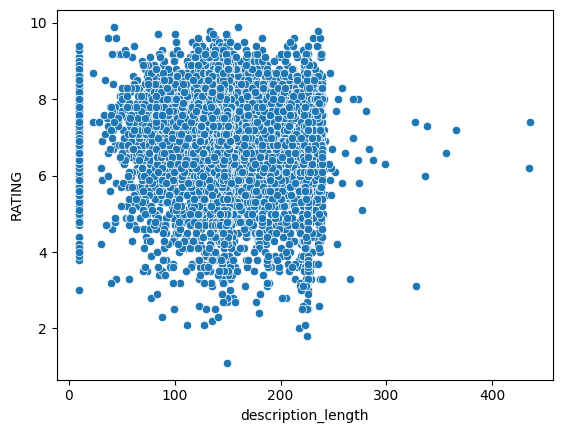

In [19]:
sns.scatterplot(data= movies, x = "description_length",y = "RATING")

#### No discernible relationship between rating and description length.

### Bonus: Do some analysis on the genre(s) of movies.  Create at least 5 questions like "What genres are the most profitable?", and write code to answer them.